# Session 3 

Much of python data science is structured around the `pandas` and `xarray` libraries, so you'll need to install those.

```
$ conda install -c conda-forge pandas xarray
```



https://jakevdp.github.io/PythonDataScienceHandbook/

## pandas

is for tabular data.

Googling `pandas tutorial` will already get you pretty far. A good starting point might be [these resources](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html) in the official docs.

See [this](https://www.dataschool.io/future-of-pandas/) article for a discussion of the roadmap of pandas - a frequent point of confusion as the project is still on 0.x versions, but is quickly becoming a dependency in many regions of the python data science ecosystem.

In [1]:
import pandas as pd
import numpy as np

pd.__version__

'0.24.2'

In [2]:
df = pd.DataFrame(dict(t=np.arange(10), x=np.random.rand(10)))
df

,t,x
0,0,0.996143
1,1,0.544962
2,2,0.671904
3,3,0.014125
4,4,0.472961
5,5,0.408356
6,6,0.735696
7,7,0.531010
8,8,0.810098
9,9,0.103069


In [3]:
df['cat'] = df.t % 3

In [4]:
df

,t,x,cat
0,0,0.996143,0
1,1,0.544962,1
2,2,0.671904,2
3,3,0.014125,0
4,4,0.472961,1
5,5,0.408356,2
6,6,0.735696,0
7,7,0.531010,1
8,8,0.810098,2
9,9,0.103069,0


In [5]:
df2 = pd.DataFrame(np.random.randn(6,4), columns=['a', 'b', 'c', 'x'])

In [6]:
def f(x):
    return np.median(x)

In [7]:
df.groupby('cat').apply(f)

cat
0    0.058597
1    1.000000
2    2.000000
dtype: float64

In [8]:
df.append(df2, sort=False)

,t,x,cat,a,b,c
0,0.0,0.996143,0.0,NaN,NaN,NaN
1,1.0,0.544962,1.0,NaN,NaN,NaN
2,2.0,0.671904,2.0,NaN,NaN,NaN
3,3.0,0.014125,0.0,NaN,NaN,NaN
4,4.0,0.472961,1.0,NaN,NaN,NaN
5,5.0,0.408356,2.0,NaN,NaN,NaN
6,6.0,0.735696,0.0,NaN,NaN,NaN
7,7.0,0.531010,1.0,NaN,NaN,NaN
8,8.0,0.810098,2.0,NaN,NaN,NaN
9,9.0,0.103069,0.0,NaN,NaN,NaN


In [9]:
df.loc[1, 'x']

0.5449616198374351

In [10]:
df.iloc[0,1]

0.9961427342918489

In [11]:
df.groupby('cat').plot.scatter(x='t', y='x', marker='.')

cat
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
2    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

## xarray

is for gridded data

In [12]:
import xarray as xr

xr.__version__

'0.12.1'

In [13]:
df.to_xarray()

<xarray.Dataset>
Dimensions:  (index: 10)
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    t        (index) int64 0 1 2 3 4 5 6 7 8 9
    x        (index) float64 0.9961 0.545 0.6719 0.01413 ... 0.531 0.8101 0.1031
    cat      (index) int64 0 1 2 0 1 2 0 1 2 0

In [14]:
ds = xr.tutorial.open_dataset('air_temperature')

ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [15]:
ds['lat']

<xarray.DataArray 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5,
       45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5,
       15. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [16]:
ds.mean(dim=['lon', 'time'])

<xarray.Dataset>
Dimensions:  (lat: 25)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Data variables:
    air      (lat) float32 257.8221 258.94217 260.61053 ... 297.85757 298.58948

In [17]:
ds.to_dataframe().groupby('lat').mean()

,air
lat,
15.0,298.589417
17.5,297.857544
20.0,297.134003
22.5,296.465698
25.0,295.757019
27.5,294.932037
30.0,293.899780
32.5,292.423553
35.0,290.761444


In [18]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [296.29   , 297.19   , ..., 295.09   , 294.38998],
        [297.79   , 298.38998, ..., 295.49   , 295.19   ]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [296.09   , 296.88998, ..., 295.69   , 

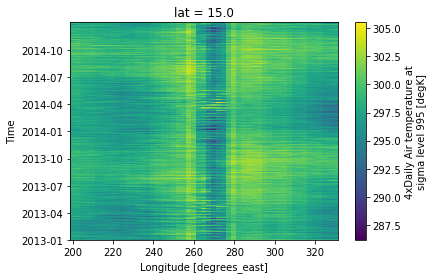

In [19]:
ds.air.sel(lat=15).plot.pcolormesh()